No handles with labels found to put in legend.


Accuracy for training data (self accuracy): 0.8438589102631725
Accuracy for test data: 0.8228728681827819


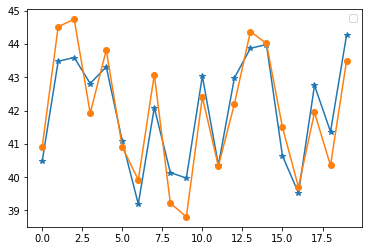

In [4]:
# regression_ex.py

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

N = 100 # 100 samples
x = np.linspace(-3, 3, N) # coordinates
noise_sample = np.random.RandomState(20)  # constant random value
# growing sinusoid with random fluctuation
sine_wave = x + np.sin(4*x) + noise_sample.uniform(N)
# plt.plot(x, sine_wave, 'o');
# plt.show()

# convert features in 2D format i.e. list of list
# print('Before: ', x.shape)
features = x[:, np.newaxis]
# print('After: ', features.shape)

# uncomment below line to see the differences
# print(x)
# print(features)

# save sine wave in variable 'targets'
targets = sine_wave


# split the training and test data
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accuracy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=23,
        # keep same proportion of 'target' in test and target data
        # stratify=targets  # can not used for single feature
    )

# training using 'training data'
regressor = LinearRegression()
regressor.fit(train_features, train_targets) # fit the model for training data

# predict the 'target' for 'training data'
prediction_training_targets = regressor.predict(train_features)

# note that 'score' uses 'feature and target (not predict_target)'
# for scoring in Regression
# whereas 'accuracy_score' uses 'features and predict_targets'
# for scoring in Classification
self_accuracy = regressor.score(train_features, train_targets)
print("Accuracy for training data (self accuracy):", self_accuracy)

# predict the 'target' for 'test data'
prediction_test_targets = regressor.predict(test_features)
test_accuracy = regressor.score(test_features, test_targets)
print("Accuracy for test data:", test_accuracy)

# plot the predicted and actual target for test data
plt.plot(prediction_test_targets, '-*')
plt.plot(test_targets, '-o' )
plt.legend()
plt.show()